In [1]:
%matplotlib inline

import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..\..')))

print(sys.path)

from vnpy.trader.app.ctaStrategy.ctaBacktesting import BacktestingEngine, OptimizationSetting, MINUTE_DB_NAME
from vnpy.trader.app.ctaStrategy.strategy.strategyAtrRsi import AtrRsiStrategy
from vnpy.trader.app.ctaStrategy.strategy.strategyBollChannel import BollChannelStrategy


['E:\\CodeLab\\GitHub\\vnpy', '', 'D:\\PythonBuildEnv\\VNConda\\python27.zip', 'D:\\PythonBuildEnv\\VNConda\\DLLs', 'D:\\PythonBuildEnv\\VNConda\\lib', 'D:\\PythonBuildEnv\\VNConda\\lib\\plat-win', 'D:\\PythonBuildEnv\\VNConda\\lib\\lib-tk', 'D:\\PythonBuildEnv\\VNConda', 'D:\\PythonBuildEnv\\VNConda\\lib\\site-packages', 'D:\\PythonBuildEnv\\VNConda\\lib\\site-packages\\simplejson-3.16.0-py2.7-win32.egg', 'D:\\PythonBuildEnv\\VNConda\\lib\\site-packages\\lxml-4.3.1-py2.7-win32.egg', 'D:\\PythonBuildEnv\\VNConda\\lib\\site-packages\\win32', 'D:\\PythonBuildEnv\\VNConda\\lib\\site-packages\\win32\\lib', 'D:\\PythonBuildEnv\\VNConda\\lib\\site-packages\\Pythonwin', 'D:\\PythonBuildEnv\\VNConda\\lib\\site-packages\\pywinpty-0.5-py2.7-win32.egg', 'D:\\PythonBuildEnv\\VNConda\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\bxu.CHINA\\.ipython']


In [2]:
# 创建回测引擎对象
engine = BacktestingEngine()

In [3]:
# 设置回测使用的数据                       
engine.setBacktestingMode(engine.BAR_MODE)    # 设置引擎的回测模式为K线
engine.setDatabase(MINUTE_DB_NAME, 'IF888')  # 设置使用的历史数据库
engine.setStartDate('20130101')               # 设置回测用的数据起始日期

In [4]:
# 配置回测引擎参数
engine.setSlippage(0.2)     # 设置滑点为股指1跳
engine.setRate(0.3/10000)   # 设置手续费万0.3
engine.setSize(300)         # 设置股指合约大小 
engine.setPriceTick(0.2)    # 设置股指最小价格变动   
engine.setCapital(400000)  # 设置回测本金

In [5]:
# 在引擎中创建策略对象
d = {'atrLength': 11}                     # 策略参数配置
engine.initStrategy(AtrRsiStrategy, {})    # 创建策略对象

In [6]:
# 运行回测
engine.runBacktesting()          # 运行回测

2019-03-22 16:04:30.196000	开始载入数据
2019-03-22 16:04:30.372000	载入完成，数据量：382530
2019-03-22 16:04:30.372000	开始回测
2019-03-22 16:04:30.428000	策略初始化完成
2019-03-22 16:04:30.428000	策略启动完成
2019-03-22 16:04:30.428000	开始回放数据
2019-03-22 16:05:06.714000	数据回放结束


2019-03-22 16:05:06.727000	计算按日统计结果
2019-03-22 16:05:06.786000	------------------------------
2019-03-22 16:05:06.787000	首个交易日：	2013-01-11
2019-03-22 16:05:06.787000	最后交易日：	2019-03-12
2019-03-22 16:05:06.787000	总交易日：	1498
2019-03-22 16:05:06.787000	盈利交易日	759
2019-03-22 16:05:06.787000	亏损交易日：	738
2019-03-22 16:05:06.787000	起始资金：	400000
2019-03-22 16:05:06.787000	结束资金：	1,675,462.62
2019-03-22 16:05:06.787000	总收益率：	318.87%
2019-03-22 16:05:06.788000	年化收益：	26.15%
2019-03-22 16:05:06.788000	总盈亏：	1,275,462.62
2019-03-22 16:05:06.788000	最大回撤: 	-248,787.7
2019-03-22 16:05:06.788000	百分比最大回撤: -18.04%
2019-03-22 16:05:06.788000	总手续费：	239,297.38
2019-03-22 16:05:06.788000	总滑点：	476,880.0
2019-03-22 16:05:06.788000	总成交金额：	7,976,579,400.0
2019-03-22 16:05:06.788000	总成交笔数：	7,948.0
2019-03-22 16:05:06.788000	日均盈亏：	851.44
2019-03-22 16:05:06.788000	日均手续费：	159.74
2019-03-22 16:05:06.788000	日均滑点：	318.34
2019-03-22 16:05:06.789000	日均成交金额：	5,324,819.36
2019-03-22 16:05:06.789000	日均成交笔数：	5.31
2019-03-22 16:0

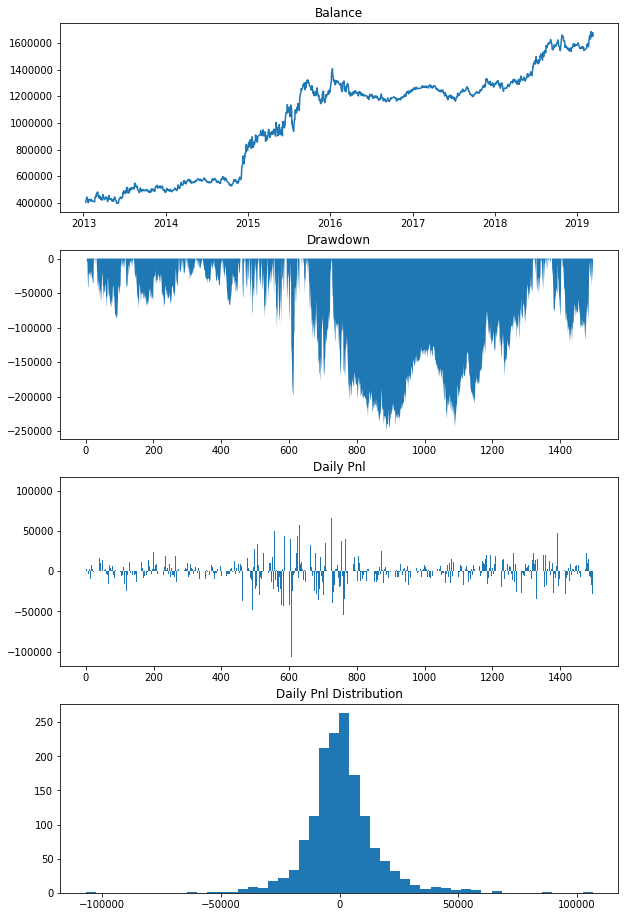

In [7]:
# 显示逐日回测结果
engine.showDailyResult()